In [11]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import seaborn as sn
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import os
import umap
import pandas as pd
import scipy
from scipy import stats
from scipy.spatial import distance
from scipy.cluster import hierarchy
import networkx as nx


In [12]:
#conda install -c conda-forge pycairo

import igraph as ig
import leidenalg as la

In [13]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [15]:
def create_corr_network(G, min_correlation_abs):
    H = G.copy()
##Checks all the edges and removes some based on corr_direction
    for factor1, factor2, weight in G.edges(data=True):
        weight_abs=abs(weight['weight'])
        #print(weight_abs)
        
        if weight_abs < min_correlation_abs or weight_abs==1:
                H.remove_edge(factor1, factor2)
    return H            
       

In [16]:
os.chdir('/Users/jianqiuzhang/Documents/Psychology/HEXACO')

In [17]:
col_keys=pd.read_csv('keys_new12')
col_keys=list(col_keys.iloc[:,1])
print(col_keys)

['HSinc5', 'HMode5', 'HGree10', 'HSinc3', 'HGree4', 'AGent10', 'AGent8', 'HFair7', 'HSinc7', 'EAnxi4', 'EDepe1', 'EAnxi5', 'EAnxi2', 'EAnxi3', 'EAnxi1', 'EAnxi6', 'ESent10', 'EDepe8', 'CPrud3', 'CPrud2', 'COrga1', 'COrga3', 'CPerf2', 'COrga4', 'CDili3', 'CPrud1', 'CDili1', 'XSoci8', 'XSoci1', 'XExpr6', 'XSoci6', 'XSoci3', 'XExpr8', 'XSocB3', 'XSocB2', 'XExpr1', 'OCrea4', 'OCrea8', 'OCrea7', 'OUnco2', 'OInqu4', 'OCrea2', 'OAesA5', 'OCrea1', 'OInqu8', 'AForg4', 'HSinc10', 'APati1', 'AForg1', 'APati3', 'APati2', 'APati5', 'APati4', 'AGent4', 'EFear6', 'EFear8', 'EFear9', 'EFear10', 'EFear5', 'EFear3', 'OInqu2', 'OAesA9', 'OAesA4', 'OInqu9', 'OInqu5', 'HGree2', 'OInqu10', 'AGent2', 'CPrud4', 'CPerf10', 'CPrud5', 'CPrud9', 'OAesA6', 'OAesA10', 'OInqu1', 'OAesA7', 'OInqu3', 'OAesA1', 'ESent6']


In [18]:
col_random=pd.read_csv('col_random')
col_random=list(col_random.iloc[:,1])
print(col_random)

['HSinc4', 'XSoci4', 'HMode4', 'EAnxi10', 'CPerf7', 'HSinc5', 'CPrud1', 'OCrea1', 'COrga2', 'XExpr6', 'EFear4', 'CPrud7', 'HFair6', 'HMode7', 'XLive9', 'EAnxi6', 'XSocB8', 'OCrea9', 'EDepe7', 'HMode6', 'CDili2', 'AGent4', 'CPerf9', 'HSinc1', 'EDepe1', 'AForg3', 'AGent2', 'AFlex4', 'OCrea7', 'HMode3', 'AForg9', 'OCrea2', 'CDili3', 'OUnco2', 'AFlex6', 'OInqu5', 'XLive4', 'EFear5', 'XSoci1', 'AForg4', 'XSoci6', 'COrga3', 'HGree4', 'OInqu8', 'EAnxi3', 'EDepe8', 'HFair8', 'XSocB2', 'CPerf6', 'XExpr4', 'CPrud4', 'APati5', 'XExpr10', 'XExpr9', 'EAnxi9', 'OInqu10', 'AFlex9', 'XSoci2', 'COrga8', 'AForg8', 'XExpr5', 'OCrea3', 'APati6', 'HMode1', 'OAesA8', 'XLive6', 'HGree9', 'EFear3', 'OAesA3', 'XExpr8', 'HMode2', 'XExpr2', 'CPerf1', 'OCrea8', 'EFear10', 'ESent7', 'OAesA10', 'AForg2', 'COrga9', 'HGree1', 'XSoci10', 'COrga7', 'EDepe10', 'ESent9', 'XLive10', 'XSocB10', 'AForg6', 'HSinc9', 'HGree6', 'EAnxi1', 'XSocB6', 'APati7', 'CDili5', 'EAnxi7', 'ESent3', 'EAnxi5', 'CPrud2', 'HFair1', 'EDepe2', 

In [19]:
code_book = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/HEXACO/codebookItems.txt',delimiter=' I')
code_book.set_index('Code')
code_book.columns=list(['Code','Content'])
codes=list(code_book['Code'])
content=code_book['Content']
code_book.index=codes
code_book.drop(['Code'], axis=1)
code_book.loc['XExpr1']

Code             XExpr1
Content     talk a lot.
Name: XExpr1, dtype: object

              0         1         2         3         4         5         6    \
HSinc5   0.146866  0.118221  0.049260 -0.098357 -0.911178  0.108118  0.042990   
HMode5   0.258003 -0.158920 -0.099635  0.152985 -0.891077 -0.043226 -0.090532   
HGree10  0.275683  0.008210 -0.140420  0.130321 -0.911990  0.040921  0.012046   
HSinc3  -0.030106  0.010633  0.088768  0.026179 -0.943653 -0.012348  0.010152   
HGree4   0.255086 -0.149615 -0.056418  0.219690 -0.878387 -0.041208 -0.047060   
...           ...       ...       ...       ...       ...       ...       ...   
OInqu1  -0.125171  0.129660 -0.203593  0.350893 -0.052663 -0.759218 -0.187133   
OAesA7   0.056709  0.109350 -0.182256 -0.004644 -0.296118  0.327046  0.384715   
OInqu3  -0.101624  0.096347 -0.144876  0.299284 -0.038902 -0.836191 -0.290719   
OAesA1  -0.081824 -0.005042  0.304834 -0.009979  0.119938 -0.173292 -0.402971   
ESent6  -0.079232  0.289700 -0.562429  0.066073 -0.360836 -0.030606  0.026108   

              7         8  

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


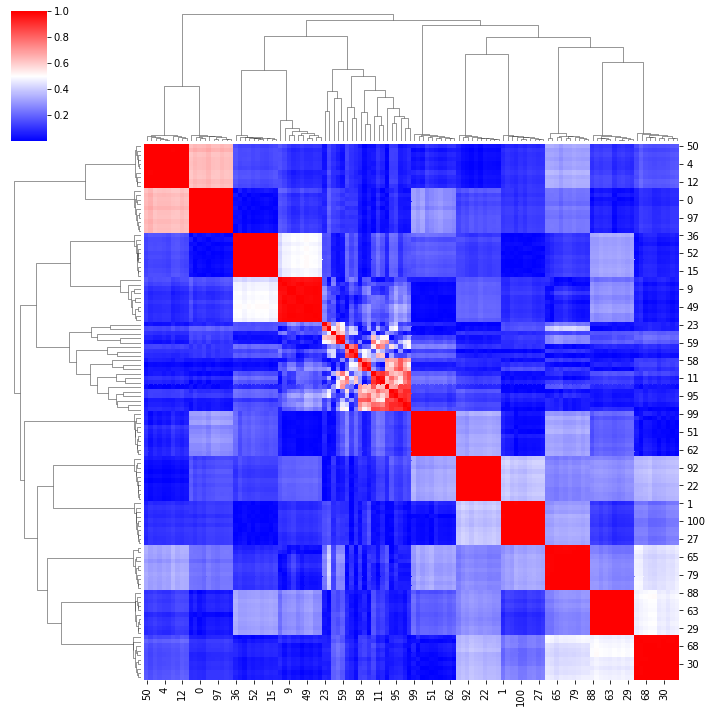

In [57]:
nodes=12
commonname='Big12Hexaco79Layer1DecoderReluCopy'
#commonname='Big10Hexaco78Layer1DecoderReluCopy'
#commonname='Big10Hexaco240Layer1DecoderReluCopy'
#commonname='Big8Hexaco85Layer1DecoderReluCopy'
commonsub='-FactorLoadings.csv'
factors=[]
for i in range(0,nodes):
    factors.append('F'+str(i))
factor_names=list(factors)   

col_names_all=[]
for i in range(1,11):

  #  print(col_names1)
    col_names=factor_names.copy()
    for k in range(0,nodes):
        col_names[k] = str(i)+col_names[k]
    if(i==0):
        col_names_all=col_names
    else:
        col_names_all=col_names_all+col_names
#print(col_names_all)        

file1name1 = commonname+str(1)+commonsub
facLoad=pd.read_csv(file1name1) 
facLoad=facLoad.iloc[:,1:nodes+1]
#index=facLoad.index



rotator = Rotator()
facLoadRotate=rotator.fit_transform(facLoad)
facLoadR=pd.DataFrame(facLoadRotate)
for i in range(2,11):
    file1name = commonname+str(i)+commonsub
    currentfacLoad=pd.read_csv(file1name)     
    currentfacLoad=currentfacLoad.iloc[:,1:nodes+1]
    currentfacLoadRotate=rotator.fit_transform(currentfacLoad)
    currentfactLoadR=pd.DataFrame(currentfacLoadRotate)
    facLoadR= pd.concat([facLoadR, currentfactLoadR], ignore_index=True,axis=1)
    #print(facLoad)
#facLoadR.columns=col_names_all
#facLoadR.index=col_random
facLoadR.index=col_keys
print(facLoadR)
loading_corr=facLoadR.corr()   
loading_corr_abs=loading_corr.abs()   
clustergrid=sn.clustermap(loading_corr_abs, cmap='bwr',method='average')

In [58]:
factor_names

['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11']

In [59]:
latent_dim=nodes
factor_columns=factor_names
number_of_items=79
base='Big12Hexaco79Layer1DecoderReluCopy'
for filei in range(1,11):
    sorted_factor_loadings=facLoadR.iloc[0:number_of_items,(filei-1)*latent_dim:filei*latent_dim]
    sortAllF=pd.DataFrame(columns=factor_columns)
    #sorted_factor_loadings.columns=factor_columns
    for i in range(latent_dim):
       current_factor=sorted_factor_loadings.iloc[0:number_of_items,i]
       #print(current_factor)
       current_factor_abs=current_factor.abs()
       current_factor_abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')      
       idx=current_factor_abs[current_factor_abs>0.2].index
       sorted_currentFactor=current_factor.loc[idx]
       #print(sorted_currentFactor)

       current_sortAllF=sorted_factor_loadings.loc[idx] 
       #print(current_sortAllF) 
       if(len(sorted_currentFactor)>0):
          first=sorted_currentFactor.iloc[0]
          #print(first) 
          if(sorted_currentFactor.iloc[0]<0):
             current_sortAllF *=(-1)
          length_cf=sorted_currentFactor.size
          #print(length_cf)
          if(length_cf>15):
             current_sortAllF_abs=current_sortAllF.abs()
             #print(current_sortAllF_abs)

             max_index = current_sortAllF_abs.idxmax(axis=1)
             #print(factor_columns[i])
             keep_idx = max_index[max_index == factor_columns[i]].index
             if(keep_idx.size > 10):    
                current_sortAllF=current_sortAllF.loc[keep_idx]
             else :
                current_sortAllF =current_sortAllF.iloc[0:10]
          current_sortAllF=current_sortAllF.round(2)
          code_content=code_book.loc[current_sortAllF.index]  
          current_sortAllF.insert(0,'content',code_content.iloc[:,1],True)  
          #print(current_sortAllF.iloc[:,0])  
          print(current_sortAllF)  
  
          sortAllF=sortAllF.append(current_sortAllF)
          #sortAllF=sortAllF.append(pd.DataFrame(data=factor_columns))
          sortAllF=sortAllF.append(pd.DataFrame(range(1)))
        
    #print(sortAllF)
    filename=base+str(filei)
    CurrentFilename=filename+'-FinalRotatedFactorLoadings'+'.csv'
    #print(sortAllF.columns)
    sortAllF.to_csv(CurrentFilename, index=True, header=True)

                                                   content     0     1     2  \
APati1    find that it takes a lot to make me feel angr...  0.92  0.01  0.33   
APati2                      rarely feel angry with people.  0.89  0.07  0.37   
AForg4            am nice to people i  should be angry at.  0.87  0.09 -0.33   
APati5                                     seldom get mad.  0.86 -0.00  0.46   
APati3                        am usually a patient person.  0.85 -0.12  0.23   
APati4                               rarely get irritated.  0.83  0.06  0.49   
AForg1                                    love my enemies.  0.82  0.15  0.06   
AGent4                      have a good word for everyone.  0.77  0.36 -0.11   
HSinc10   let people push me around to help them feel i...  0.69 -0.16 -0.59   
AGent8                                speak ill of others. -0.62  0.09 -0.19   

            3     4     5     6     7     8     9    10    11  
APati1  -0.05 -0.24  0.00  0.03 -0.01 -0.00  0.04 -0.02

                                                   content    12    13    14  \
HSinc3    tell other people what they want to hear so t...  0.98  0.01  0.12   
HSinc5           switch my loyalties when i  feel like it.  0.95  0.11  0.05   
HGree10                   am out for my own personal gain.  0.94  0.04 -0.15   
HMode5    would like to have more power than other people.  0.92 -0.17 -0.09   
HGree4                       have a strong need for power.  0.91 -0.16 -0.04   
HFair7                                 cheat to get ahead.  0.90  0.05  0.01   
HSinc7                 pretend to be concerned for others.  0.88  0.33 -0.08   
AGent10                    criticize others' shortcomings.  0.80  0.05  0.01   
AGent8                                speak ill of others.  0.74 -0.08  0.23   
OAesA4                   enjoy feeling close to the earth. -0.40 -0.01  0.16   

           15    16    17    18    19    20    21    22    23  
HSinc3   0.03 -0.04  0.02  0.03  0.01  0.05  0.00 -0.12

                                                   content    24    25    26  \
OInqu5             find political discussions interesting.  0.05 -0.11 -0.12   
OInqu9    don't bother worrying about political and soc... -0.04 -0.05 -0.15   
OInqu4                  love to read challenging material.  0.11 -0.05  0.04   
OInqu10              will not probe deeply into a subject. -0.21  0.19 -0.08   
OInqu3                           enjoy intellectual games.  0.30 -0.19 -0.04   
OInqu8                   avoid difficult reading material. -0.04  0.11 -0.12   
OAesA5              have read the great literary classics.  0.12  0.02  0.03   
OInqu1                           am interested in science.  0.34 -0.25 -0.04   
OUnco2       know that my ideas sometimes surprise people. -0.05 -0.01 -0.23   
OAesA7    seldom notice the emotional aspects of painti... -0.01 -0.20 -0.28   

           27    28    29    30    31    32    33    34    35  
OInqu5  -0.16  0.09  0.92 -0.03 -0.05 -0.03  0.14 -0.20

                                                   content    36    37    38  \
OInqu5             find political discussions interesting. -0.08 -0.10 -0.01   
OInqu9    don't bother worrying about political and soc...  0.06 -0.08 -0.15   
OInqu4                  love to read challenging material. -0.14 -0.04  0.13   
OInqu8                   avoid difficult reading material.  0.07  0.10 -0.15   
OInqu10              will not probe deeply into a subject.  0.25  0.17 -0.05   
OInqu3                           enjoy intellectual games. -0.31 -0.15 -0.06   
OAesA5              have read the great literary classics. -0.13  0.02  0.38   
OInqu1                           am interested in science. -0.38 -0.25 -0.21   
OUnco2       know that my ideas sometimes surprise people.  0.03 -0.02 -0.04   
OAesA7    seldom notice the emotional aspects of painti... -0.00 -0.20 -0.71   

           39    40    41    42    43    44    45    46    47  
OInqu5  -0.19  0.10  0.92 -0.05 -0.06  0.15 -0.21 -0.03

                                                 content    48    49    50  \
CPrud3                    do things according to a plan. -0.13  0.05  0.02   
CPrud2                     make plans and stick to them. -0.01  0.07 -0.06   
CPerf2             continue until everything is perfect.  0.09  0.02  0.16   
COrga3                                       like order. -0.20 -0.05  0.05   
COrga1                                 keep things tidy.  0.01 -0.01 -0.05   
COrga4                                  like to tidy up.  0.10 -0.07 -0.01   
CDili3                           am exacting in my work.  0.05  0.04  0.10   
CPrud1                                   avoid mistakes. -0.13  0.04  0.14   
CDili1                 push myself very hard to succeed.  0.24  0.09 -0.06   
CPrud5   do things without thinking of the consequences.  0.38 -0.40  0.32   

          51    52    53    54    55    56    57    58    59  
CPrud3 -0.02  0.98 -0.05  0.05  0.09 -0.04 -0.02  0.01 -0.01  
CPrud2 -0.11  0

                                                   content    60    61    62  \
EAnxi4    get upset by unpleasant thoughts that come in...  0.13  0.00  0.98   
EAnxi1    often worry about things that turn out to be ...  0.06  0.14  0.96   
EDepe1                                   need reassurance. -0.04 -0.09  0.96   
EAnxi3                            get stressed out easily.  0.29  0.16  0.95   
EAnxi2                                 worry about things.  0.12  0.13  0.95   
EAnxi5                                       panic easily.  0.22  0.11  0.92   
EAnxi6                                       rarely worry. -0.22 -0.13 -0.91   
EDepe8                                       seek support. -0.09 -0.43  0.85   
ESent10                              seldom get emotional. -0.30  0.29 -0.80   
CPrud9      don't know why i  do some of the things i  do.  0.06  0.03  0.67   

           63    64    65    66    67    68    69    70    71  
EAnxi4  -0.10 -0.04  0.15 -0.06 -0.05 -0.04 -0.01  0.09

                                        content    60    61    62    63    64  \
AForg1                         love my enemies. -0.80 -0.22 -0.08  0.19  0.02   
OAesA5   have read the great literary classics. -0.04  0.01  0.00  0.75  0.14   
OInqu1                am interested in science. -0.18  0.15 -0.21  0.72  0.30   
OInqu8        avoid difficult reading material. -0.01 -0.06  0.10 -0.79 -0.05   
OInqu4       love to read challenging material. -0.05  0.06 -0.05  0.80  0.12   

          65    66    67    68    69    70    71  
AForg1  0.01 -0.09 -0.11 -0.08  0.26 -0.40  0.06  
OAesA5  0.34 -0.06 -0.06 -0.31  0.23 -0.23 -0.01  
OInqu1 -0.23  0.03 -0.18 -0.15 -0.23 -0.22 -0.03  
OInqu8 -0.13  0.13  0.05  0.34 -0.21  0.14  0.08  
OInqu4  0.11 -0.06 -0.10 -0.34  0.20 -0.18 -0.06  
                                                   content    60    61    62  \
EFear6                      like to do frightening things.  0.02  0.15  0.22   
EFear8                          love dangerous 

                                                   content    72    73    74  \
OInqu5             find political discussions interesting.  0.04 -0.10 -0.03   
OInqu9    don't bother worrying about political and soc...  0.03 -0.05  0.01   
OInqu4                  love to read challenging material.  0.05 -0.05  0.34   
OInqu8                   avoid difficult reading material.  0.00  0.09 -0.35   
OInqu10              will not probe deeply into a subject.  0.16  0.18 -0.27   
OInqu3                           enjoy intellectual games.  0.13 -0.16  0.31   
OAesA5              have read the great literary classics.  0.06 -0.01  0.33   
OInqu1                           am interested in science.  0.20 -0.26  0.15   
OAesA7    seldom notice the emotional aspects of painti... -0.08 -0.20 -0.42   
OUnco2       know that my ideas sometimes surprise people.  0.12 -0.02  0.70   

           75    76    77    78    79    80    81    82    83  
OInqu5  -0.16 -0.05  0.13 -0.10 -0.05  0.91  0.20  0.10

                                                 content    84    85    86  \
CPrud3                    do things according to a plan.  0.02  0.02 -0.01   
CPrud2                     make plans and stick to them. -0.08  0.11 -0.12   
CPerf2             continue until everything is perfect.  0.15 -0.04  0.15   
COrga1                                 keep things tidy. -0.05 -0.04 -0.13   
COrga3                                       like order.  0.04 -0.09  0.07   
COrga4                                  like to tidy up. -0.02  0.06 -0.01   
CDili3                           am exacting in my work.  0.10 -0.05 -0.11   
CPrud1                                   avoid mistakes.  0.13 -0.21 -0.08   
CDili1                 push myself very hard to succeed. -0.05  0.15  0.01   
CPrud5   do things without thinking of the consequences.  0.33  0.24  0.32   

          87    88    89    90    91    92    93    94    95  
CPrud3  0.96 -0.02 -0.02  0.07 -0.10 -0.14 -0.03  0.02 -0.04  
CPrud2  0.95 -0

                                        content    84    85    86    87    88  \
OInqu8        avoid difficult reading material. -0.12 -0.06 -0.07  0.06 -0.81   
OAesA5   have read the great literary classics.  0.03  0.02 -0.05 -0.14  0.79   
OInqu4       love to read challenging material.  0.04  0.04  0.01 -0.13  0.83   

          89    90    91    92    93    94    95  
OInqu8  0.01 -0.34  0.15  0.16  0.05  0.04  0.24  
OAesA5  0.03  0.33 -0.37 -0.26 -0.04  0.02 -0.24  
OInqu4  0.05  0.34 -0.13 -0.20 -0.10 -0.03 -0.22  
                                        content    96    97    98    99   100  \
CPrud3           do things according to a plan.  0.95 -0.00 -0.13 -0.01 -0.03   
CPrud2            make plans and stick to them.  0.94 -0.05 -0.02  0.11 -0.12   
CPerf2    continue until everything is perfect.  0.91 -0.01  0.09 -0.17  0.04   
COrga1                        keep things tidy.  0.91 -0.09  0.02  0.09  0.03   
COrga3                              like order.  0.91 -0.00 -0.20 

                                                   content    96    97    98  \
AGent2                           take things as they come. -0.27 -0.50  0.36   
CPerf10                  prefer to just let things happen. -0.56 -0.43  0.12   
HGree2         don't strive for elegance in my appearance. -0.43 -0.06 -0.03   
CPrud5     do things without thinking of the consequences. -0.56  0.13  0.36   
OInqu9    don't bother worrying about political and soc... -0.03 -0.03  0.03   
CPrud4                  jump into things without thinking. -0.47  0.06  0.49   
CPrud9      don't know why i  do some of the things i  do. -0.36  0.04  0.23   
OInqu10              will not probe deeply into a subject. -0.21 -0.15 -0.06   
OInqu5             find political discussions interesting.  0.04 -0.04  0.10   

           99   100   101   102   103   104   105   106   107  
AGent2   0.29 -0.11 -0.02 -0.13  0.13  0.07  0.57 -0.06  0.04  
CPerf10 -0.04  0.13  0.04  0.03  0.31  0.06  0.54  0.01  0.02  
HGree2 

                                                   content   108   109   110  \
OInqu5             find political discussions interesting.  0.16 -0.10  0.12   
OInqu9    don't bother worrying about political and soc... -0.16 -0.05  0.18   
OInqu4                  love to read challenging material. -0.07 -0.04 -0.05   
OInqu8                   avoid difficult reading material.  0.06  0.10  0.13   
OInqu10              will not probe deeply into a subject. -0.06  0.19  0.09   
OInqu3                           enjoy intellectual games. -0.08 -0.16  0.01   
OAesA5              have read the great literary classics. -0.03  0.03 -0.05   
OInqu1                           am interested in science. -0.13 -0.24  0.03   
OUnco2       know that my ideas sometimes surprise people.  0.11  0.01  0.22   
OCrea4                                   am full of ideas.  0.14 -0.01  0.00   

          111   112   113   114   115   116   117   118   119  
OInqu5  -0.03  0.90 -0.04  0.00 -0.05 -0.18 -0.12 -0.11

                                                   content   108   109   110  \
EFear6                      like to do frightening things. -0.13  0.17 -0.28   
EFear8                          love dangerous situations. -0.17  0.17 -0.28   
EFear5    would never go riding down a stretch of rapid...  0.21 -0.35 -0.03   
EFear10                          am willing to take risks. -0.30  0.30 -0.11   
EFear9    would be good at rescuing people from a burni... -0.28  0.37  0.07   
OInqu2               would love to explore strange places. -0.07 -0.01  0.02   
EFear3    would fear walking in a high-crime part of a ...  0.13 -0.57  0.08   
CPrud4                  jump into things without thinking. -0.30 -0.37 -0.26   
OAesA4                   enjoy feeling close to the earth. -0.04 -0.15  0.37   
OAesA9                               do not like concerts.  0.51  0.08 -0.24   

          111   112   113   114   115   116   117   118   119  
EFear6   0.05 -0.08 -0.06 -0.10  0.02 -0.05 -0.04  0.91

In [60]:
#extracts the indices from the correlation matrix, which are the factors
factors = loading_corr.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(loading_corr_abs)

#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: factors[x])

#shows the edges with their corresponding weights
#G.edges(data=True)


In [61]:
NewG=create_corr_network(G,0.875)
nx.write_graphml(NewG,'graph.graphml') # Export NX graph to file

Gix = ig.read('graph.graphml',format="graphml") 

In [62]:
partition = la.find_partition(Gix, la.ModularityVertexPartition)


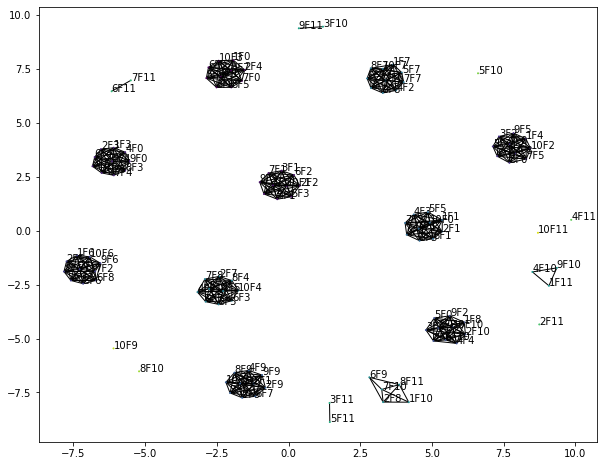

In [63]:
visual_style = {}
visual_style["vertex_size"] = 1
visual_style["vertex_label"] = col_names_all
visual_style["bbox"] = (8000, 8000)
visual_style["margin"] = 400
visual_style["label_size"]=50
fig, ax = plt.subplots(figsize=(10,8))
ig.plot(partition, target=ax,**visual_style)
plt.savefig('Big12Input79DataClusters50.pdf',dpi=400)

In [51]:
print(partition)
factor_df=pd.DataFrame(col_names_all)
lp=len(partition)
for i in range(lp):
    ids=partition[i]
    number_of_factors=len(ids)
    totaln=number_of_factors*number_of_factors
    totaln2=totaln-number_of_factors
    factorNames=factor_df.iloc[ids]
    print(factorNames)
    #print(ids)
    loading_reordered=loading_corr.iloc[ids,ids]    
    loading_reordered_abs=loading_reordered.abs()
    print((loading_reordered_abs.mean().mean()*(totaln)-number_of_factors)/totaln2)
    #print(loading_reordered)

Clustering with 90 elements and 8 clusters
[0] 2, 5, 9, 13, 19, 26, 30, 33, 36, 44, 51, 52, 56, 59, 67, 70, 72, 78, 85,
    86
[1] 0, 10, 18, 27, 37, 49, 54, 63, 74, 83
[2] 1, 11, 21, 28, 38, 48, 58, 64, 75, 89
[3] 3, 14, 20, 31, 40, 50, 60, 69, 76, 84
[4] 4, 12, 22, 32, 41, 45, 55, 66, 73, 81
[5] 6, 16, 24, 34, 43, 47, 57, 71, 80, 88
[6] 7, 15, 23, 29, 42, 53, 62, 65, 79, 87
[7] 8, 17, 25, 35, 39, 46, 61, 68, 77, 82
       0
2    1F2
5    1F5
9    2F0
13   2F4
19   3F1
26   3F8
30   4F3
33   4F6
36   5F0
44   5F8
51   6F6
52   6F7
56   7F2
59   7F5
67   8F4
70   8F7
72   9F0
78   9F6
85  10F4
86  10F5
0.8000850500665698
       0
0    1F0
10   2F1
18   3F0
27   4F0
37   5F1
49   6F4
54   7F0
63   8F0
74   9F2
83  10F2
0.9979167631231274
       0
1    1F1
11   2F2
21   3F3
28   4F1
38   5F2
48   6F3
58   7F4
64   8F1
75   9F3
89  10F8
0.9975246831218453
       0
3    1F3
14   2F5
20   3F2
31   4F4
40   5F4
50   6F5
60   7F6
69   8F6
76   9F4
84  10F3
0.998412961385628
       0
4    1F4


In [210]:
## nodes=8
commonname='Big12Hexaco79Layer1DecoderReluCopy10'
commonsub='-FinalRotatedFactorLoadings.csv'

     

file1name1 = commonname+str(1)+commonsub
facLoad=pd.read_csv(file1name1) 

items=facLoad.iloc[:,0]


idx=items=='0'
ci=items[items == '0'].index[0]
lastci=-1
overall=items[lastci+1:min(ci-1,lastci+10)]
for i in range(1,10):
    lastci=ci
    ci=items[items == '0'].index[i]
    overall=overall.append(items[lastci+1:min(ci-1,lastci+10)])



print(overall)    
  
import collections


counter=collections.Counter(overall)

values=list(counter.values())
print(values)
v=np.array(values)
ids= (v >= 1)
print(v[ids])
keys=list(counter.keys())
k=np.array(keys)
newKeys=k[ids]
print(newKeys)
len(newKeys)
keydf=pd.DataFrame(newKeys)
keydf.to_csv('keys_new12', index=True, header=True)
keydf.shape



0       HSinc5
1       HMode5
2      HGree10
3       HSinc3
4       HGree4
        ...   
132     HGree2
133     OInqu3
134     OAesA1
135     ESent6
136     OInqu5
Name: Unnamed: 0, Length: 81, dtype: object
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1]
['HSinc5' 'HMode5' 'HGree10' 'HSinc3' 'HGree4' 'AGent10' 'AGent8' 'HFair7'
 'HSinc7' 'EAnxi4' 'EDepe1' 'EAnxi5' 'EAnxi2' 'EAnxi3' 'EAnxi1' 'EAnxi6'
 'ESent10' 'EDepe8' 'CPrud3' 'CPrud2' 'COrga1' 'COrga3' 'CPerf2' 'COrga4'
 'CDili3' 'CPrud1' 'CDili1' 'XSoci8' 'XSoci1' 'XExpr6' 'XSoci6' 'XSoci3'
 'XExpr8' 'XSocB3' 'XSocB2' 'XExpr1' 'OCrea4' 'OCrea8' 'OCrea7' 'OUnco2'
 'OInqu4' 'OCrea2' 'OAe

(79, 1)

In [133]:
## nodes=8
commonname='Big8HexacoLayer1DecoderReluCopy'
commonsub='-FinalFactorLoadings.csv'

col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7']

     

file1name1 = commonname+str(2)+commonsub
facLoad=pd.read_csv(file1name1) 

items=facLoad.iloc[:,0]


idx=items=='0'
ci=items[items == '0'].index[0]
lastci=-1
overall=items[lastci+1:min(ci-1,lastci+15)]
for i in range(1,8):
    lastci=ci
    ci=items[items == '0'].index[i]
    overall=overall.append(items[lastci+1:min(ci-1,lastci+15)])


for i in range(3,11):
    file1name = commonname+str(i)+commonsub
    currentfacLoad=pd.read_csv(file1name)     
    currentitems=currentfacLoad.iloc[:,0]
    idx=currentitems=='0'
    ci=-1
    for i in range(0,7):
        lastci=ci
        ci=currentitems[currentitems == '0'].index[i]
        overall=overall.append(currentitems[lastci+1:min(ci-1,lastci+15)])

print(overall)    
  
import collections


counter=collections.Counter(overall)

values=list(counter.values())
print(values)
v=np.array(values)
ids= (v >= 5)
print(v[ids])
keys=list(counter.keys())
k=np.array(keys)
newKeys=k[ids]
print(newKeys)
len(newKeys)
keydf=pd.DataFrame(newKeys)
keydf.to_csv('keys2', index=True, header=True)


0       XSocB1
1       XSocB5
2       XExpr2
3       XSocB4
4       XSocB6
        ...   
258    AFlex10
259    OInqu10
260     APati5
261     HMode2
262     HMode4
Name: Unnamed: 0, Length: 792, dtype: object
[2, 2, 2, 5, 5, 2, 3, 3, 2, 2, 3, 2, 3, 1, 2, 2, 1, 2, 2, 1, 5, 9, 2, 2, 2, 1, 3, 1, 7, 6, 6, 4, 6, 7, 6, 4, 4, 4, 4, 5, 3, 6, 9, 8, 9, 6, 7, 9, 9, 7, 7, 9, 8, 8, 6, 6, 9, 9, 9, 9, 8, 7, 8, 7, 5, 8, 6, 7, 8, 9, 9, 9, 9, 11, 9, 7, 5, 6, 4, 9, 9, 9, 9, 10, 7, 4, 7, 7, 6, 7, 8, 7, 5, 8, 6, 7, 7, 6, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 3, 3, 5, 6, 6, 8, 7, 7, 5, 5, 6, 4, 4, 3, 2, 2, 4, 3, 6, 2, 3, 1, 1, 1, 1, 1, 5, 4, 1, 4, 3, 3, 2, 1, 4, 4, 3, 4, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1]
[ 5  5  5  9  7  6  6  6  7  6  5  6  9  8  9  6  7  9  9  7  7  9  8  8
  6  6  9  9  9  9  8  7  8  7  5  8  6  7  8  9  9  9  9 11  9  7  5  6
  9  9  9  9 10  7  7  7  6  7  8  7  5  8  6  7  7  6  5  5  5  5  5  5
  5  5  5  6  6  8  7  7  5  5  6  6  5]
['XSocB4' 'XSocB6

In [46]:

data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/HEXACO/data.csv')
col_name = list(data_read.columns)
data = data_read.iloc[:,col_name.index('HSinc1'):col_name.index('OUnco10')+1]
quality = data_read.iloc[:,col_name.index('V1'):col_name.index('V2')+1]
dropi=quality.query(('V1 < 7') or ('V2<7') ).index
dropindex=list(dropi)
#col_drop=col_name[col_name.index('F1'):col_name.index('N10')+1]
dropdata=data.drop(dropindex,axis=0)

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (243) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [62]:
items_corr=dropdata.corr()
items_corr_abs=items_corr.abs()
items_corr_abs

,HSinc1,HSinc2,HSinc3,HSinc4,HSinc5,HSinc6,HSinc7,HSinc8,HSinc9,HSinc10,...,OUnco1,OUnco2,OUnco3,OUnco4,OUnco5,OUnco6,OUnco7,OUnco8,OUnco9,OUnco10
HSinc1,1.000000,0.277770,0.295200,0.401894,0.198401,0.402542,0.228688,0.251225,0.188201,0.072785,...,0.047042,0.001408,0.027218,0.046028,0.043368,0.052715,0.023196,0.022043,0.055139,0.029425
HSinc2,0.277770,1.000000,0.480447,0.406605,0.303991,0.397027,0.243725,0.245256,0.305828,0.098646,...,0.081841,0.092457,0.061514,0.108074,0.006092,0.050446,0.038728,0.114886,0.006759,0.069346
HSinc3,0.295200,0.480447,1.000000,0.378827,0.346614,0.436159,0.372710,0.325884,0.271519,0.121957,...,0.058793,0.083097,0.075279,0.108496,0.012923,0.042420,0.031923,0.100945,0.002705,0.088404
HSinc4,0.401894,0.406605,0.378827,1.000000,0.226578,0.638699,0.201758,0.336922,0.318967,0.137621,...,0.131423,0.090462,0.086326,0.058997,0.017144,0.066628,0.026944,0.087806,0.022970,0.042664
HSinc5,0.198401,0.303991,0.346614,0.226578,1.000000,0.250755,0.343176,0.252956,0.143677,0.026908,...,0.059252,0.072793,0.092588,0.149516,0.023173,0.035652,0.005033,0.062047,0.033568,0.130778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OUnco6,0.052715,0.050446,0.042420,0.066628,0.035652,0.116247,0.034012,0.009806,0.195126,0.099773,...,0.294731,0.172297,0.321680,0.173223,0.256736,1.000000,0.401584,0.352935,0.430141,0.240406
OUnco7,0.023196,0.038728,0.031923,0.026944,0.005033,0.072836,0.000410,0.003392,0.173971,0.142415,...,0.239548,0.156523,0.258859,0.234597,0.295893,0.401584,1.000000,0.406976,0.714112,0.225726
OUnco8,0.022043,0.114886,0.100945,0.087806,0.062047,0.125985,0.047688,0.054768,0.263734,0.116399,...,0.210566,0.103892,0.154305,0.238009,0.224705,0.352935,0.406976,1.000000,0.418869,0.229713
OUnco9,0.055139,0.006759,0.002705,0.022970,0.033568,0.037136,0.033783,0.025411,0.161694,0.144437,...,0.265538,0.170727,0.273069,0.251120,0.296931,0.430141,0.714112,0.418869,1.000000,0.221352


In [52]:
#extracts the indices from the correlation matrix, which are the factors
factors = items_corr.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(items_corr_abs)

#Crates graph using the data of the correlation matrix
HG = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
HG = nx.relabel_nodes(HG,lambda x: factors[x])

#shows the edges with their corresponding weights
#G.edges(data=True)


In [66]:
 NewHG=create_corr_network(HG,0.8)
nx.write_graphml(NewHG,'graphHG.graphml') # Export NX graph to file

HGix = ig.read('graphHG.graphml',format="graphml") 

In [67]:
partition = la.find_partition(HGix, la.ModularityVertexPartition)


In [68]:
print(partition)


Clustering with 240 elements and 237 clusters
[  0] 31, 33
[  1] 72, 75
[  2] 85, 87
[  3] 0
[  4] 1
[  5] 2
[  6] 3
[  7] 4
[  8] 5
[  9] 6
[ 10] 7
[ 11] 8
[ 12] 9
[ 13] 10
[ 14] 11
[ 15] 12
[ 16] 13
[ 17] 14
[ 18] 15
[ 19] 16
[ 20] 17
[ 21] 18
[ 22] 19
[ 23] 20
[ 24] 21
[ 25] 22
[ 26] 23
[ 27] 24
[ 28] 25
[ 29] 26
[ 30] 27
[ 31] 28
[ 32] 29
[ 33] 30
[ 34] 32
[ 35] 34
[ 36] 35
[ 37] 36
[ 38] 37
[ 39] 38
[ 40] 39
[ 41] 40
[ 42] 41
[ 43] 42
[ 44] 43
[ 45] 44
[ 46] 45
[ 47] 46
[ 48] 47
[ 49] 48
[ 50] 49
[ 51] 50
[ 52] 51
[ 53] 52
[ 54] 53
[ 55] 54
[ 56] 55
[ 57] 56
[ 58] 57
[ 59] 58
[ 60] 59
[ 61] 60
[ 62] 61
[ 63] 62
[ 64] 63
[ 65] 64
[ 66] 65
[ 67] 66
[ 68] 67
[ 69] 68
[ 70] 69
[ 71] 70
[ 72] 71
[ 73] 73
[ 74] 74
[ 75] 76
[ 76] 77
[ 77] 78
[ 78] 79
[ 79] 80
[ 80] 81
[ 81] 82
[ 82] 83
[ 83] 84
[ 84] 86
[ 85] 88
[ 86] 89
[ 87] 90
[ 88] 91
[ 89] 92
[ 90] 93
[ 91] 94
[ 92] 95
[ 93] 96
[ 94] 97
[ 95] 98
[ 96] 99
[ 97] 100
[ 98] 101
[ 99] 102
[100] 103
[101] 104
[102] 105
[103] 106
[104] 107